#### Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
import itertools
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#### Read the data as a dataframe

In [2]:
df = pd.read_csv("concrete.csv")

#### Printing the first few elements of the dataframe

In [3]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

#### Checking datadtypes and info of all columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


#### Checking the presence of null vales

In [6]:
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

#### Desciption of the numerical columns

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


#### Computing mean of individual columns

In [8]:
df.median()

cement          272.900
slag             22.000
ash               0.000
water           185.000
superplastic      6.400
coarseagg       968.000
fineagg         779.500
age              28.000
strength         34.445
dtype: float64

#### Computing standard deviation of individual columns

In [9]:
df.std()

cement          104.506364
slag             86.279342
ash              63.997004
water            21.354219
superplastic      5.973841
coarseagg        77.753954
fineagg          80.175980
age              63.169912
strength         16.705742
dtype: float64

#### Printing the shape of the dataframe

In [10]:
df.shape

(1030, 9)

#### Plotting the distribution of individual columns

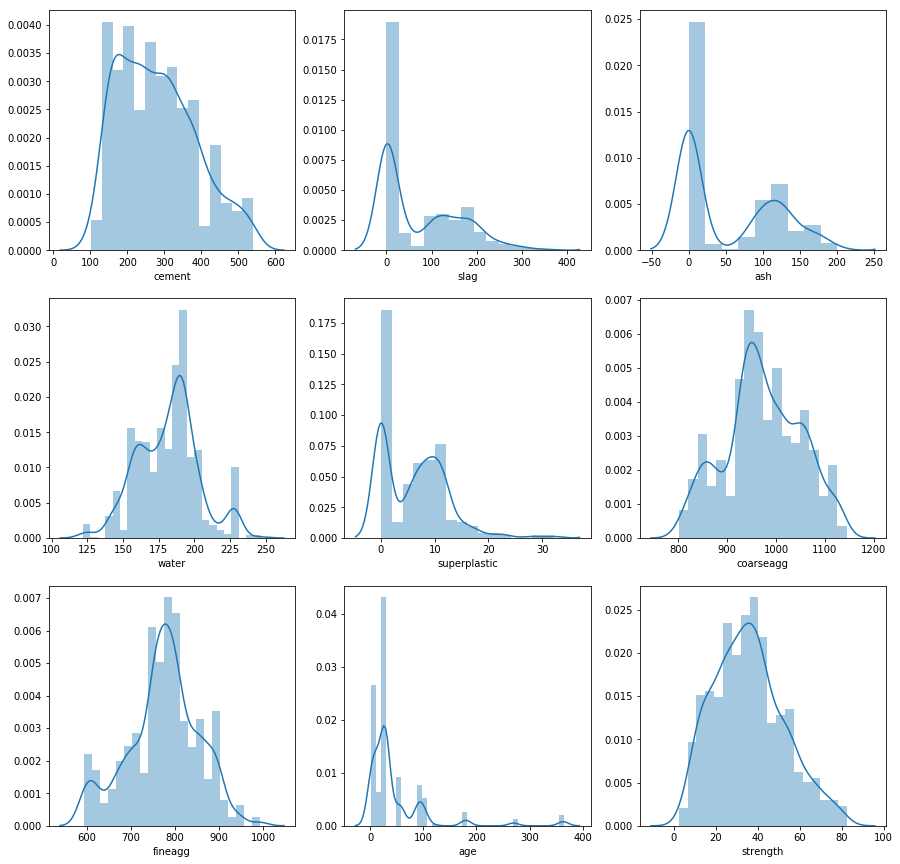

In [11]:
plt.figure(figsize=(15,15))
pos = 1
for i in df.columns:
    plt.subplot(3, 3, pos)
    sns.distplot(df[i])
    pos += 1 

#### We see the data is almost normally distributed with skewness in a few columns which may be due to presence of outliers

#### Plotting the distribution of the target column

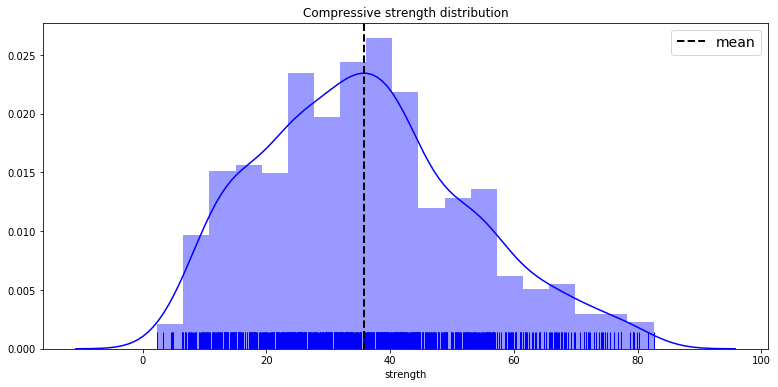

In [12]:
plt.figure(figsize=(13,6))
sns.distplot(df["strength"],color="b",rug=True)
plt.axvline(df["strength"].mean(),
            linestyle="dashed",color="k",
            label='mean',linewidth=2)
plt.legend(loc="best",prop={"size":14})
plt.title("Compressive strength distribution")
plt.show()

#### Comparing indepenedent variables with the target variable

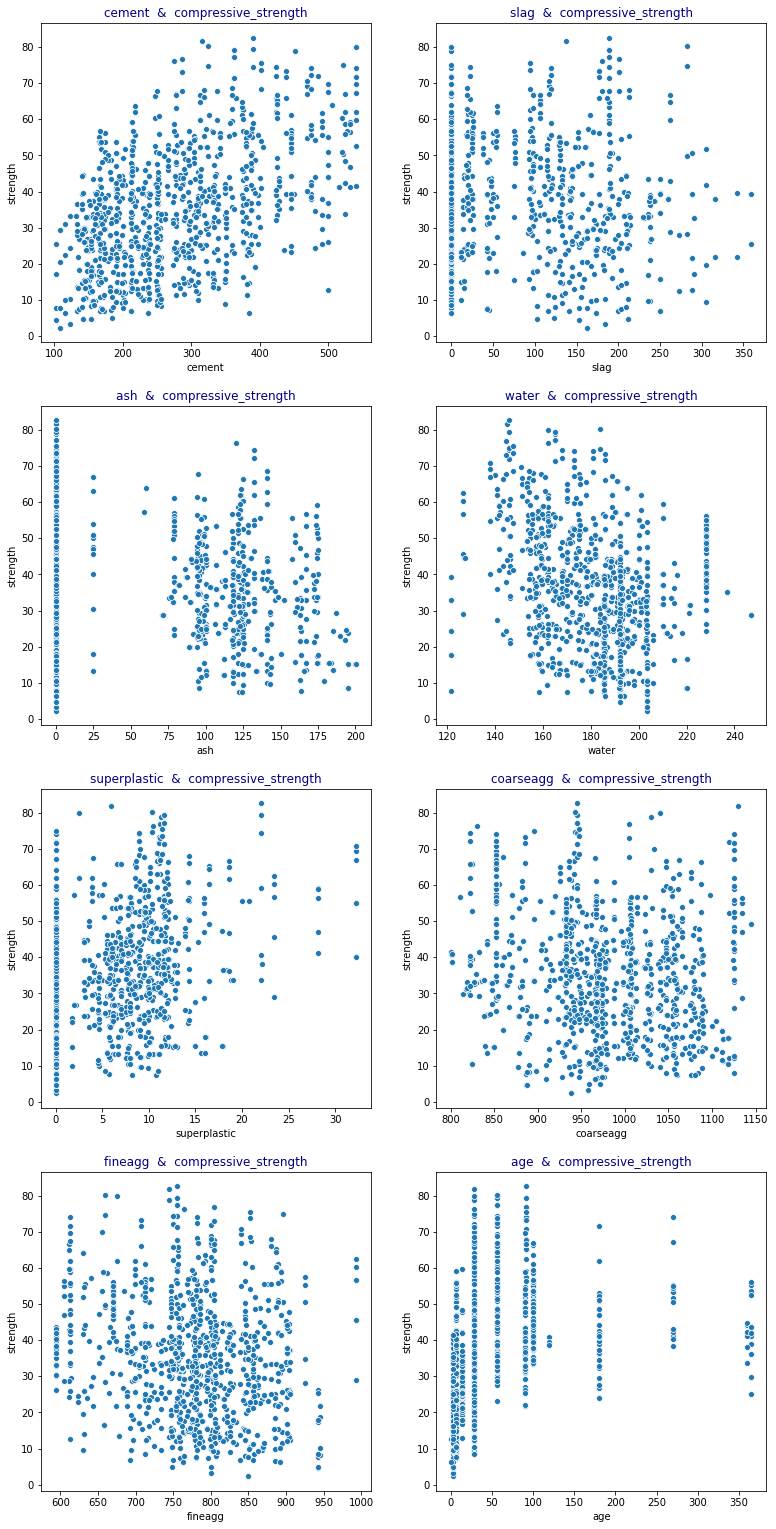

In [13]:
cols = [i for i in df.columns if i not in 'strength']
length = len(cols)

plt.figure(figsize=(13,27))
for i,j in itertools.zip_longest(cols,range(length)):
    plt.subplot(4,2,j+1)
    sns.scatterplot(df[i], df["strength"])
    plt.title(i+"  &  compressive_strength",color="navy")

#### Plotting the correlation matrix among the features

Text(0.5, 1.0, 'Correlation between variables')

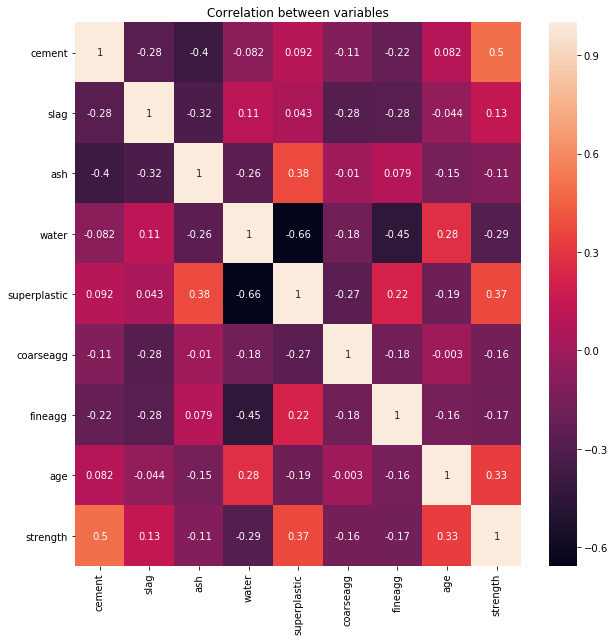

In [14]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(method = 'pearson'), annot = True)
plt.title("Correlation between variables")

#### Identifying outliers with boxplots

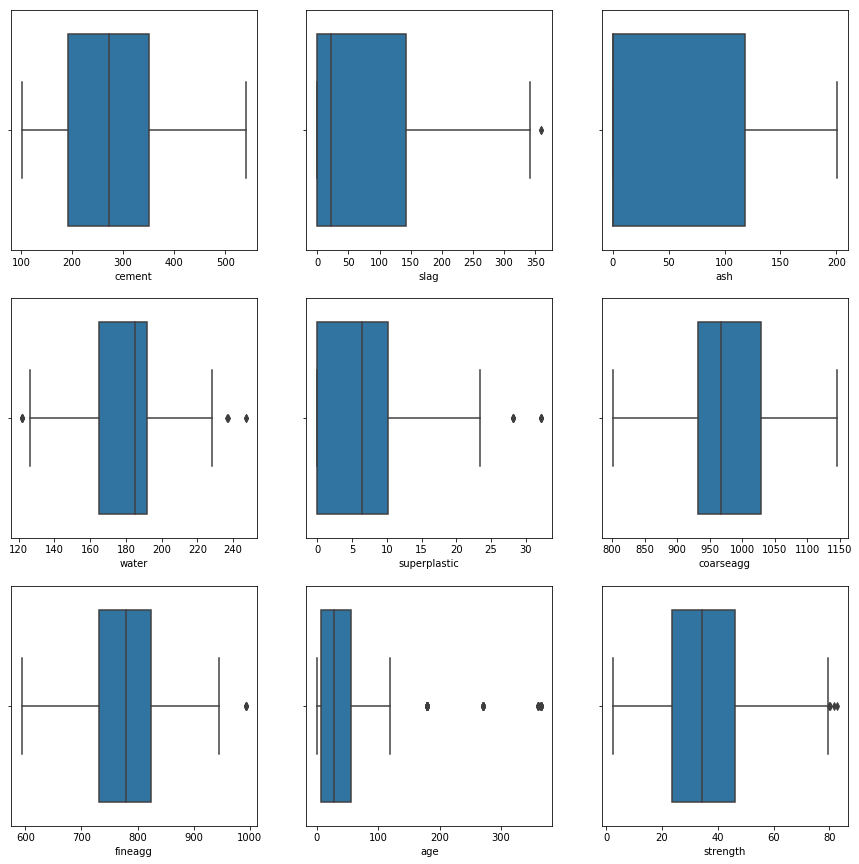

In [15]:
plt.figure(figsize=(15,15))
pos = 1
for i in df.columns:
    plt.subplot(3, 3, pos)
    sns.boxplot(df[i])
    pos += 1 

#### There are a few outliers in few of the columns. We will treat them soon

#### Plotting a pair panel grid to represent the relation acroos features

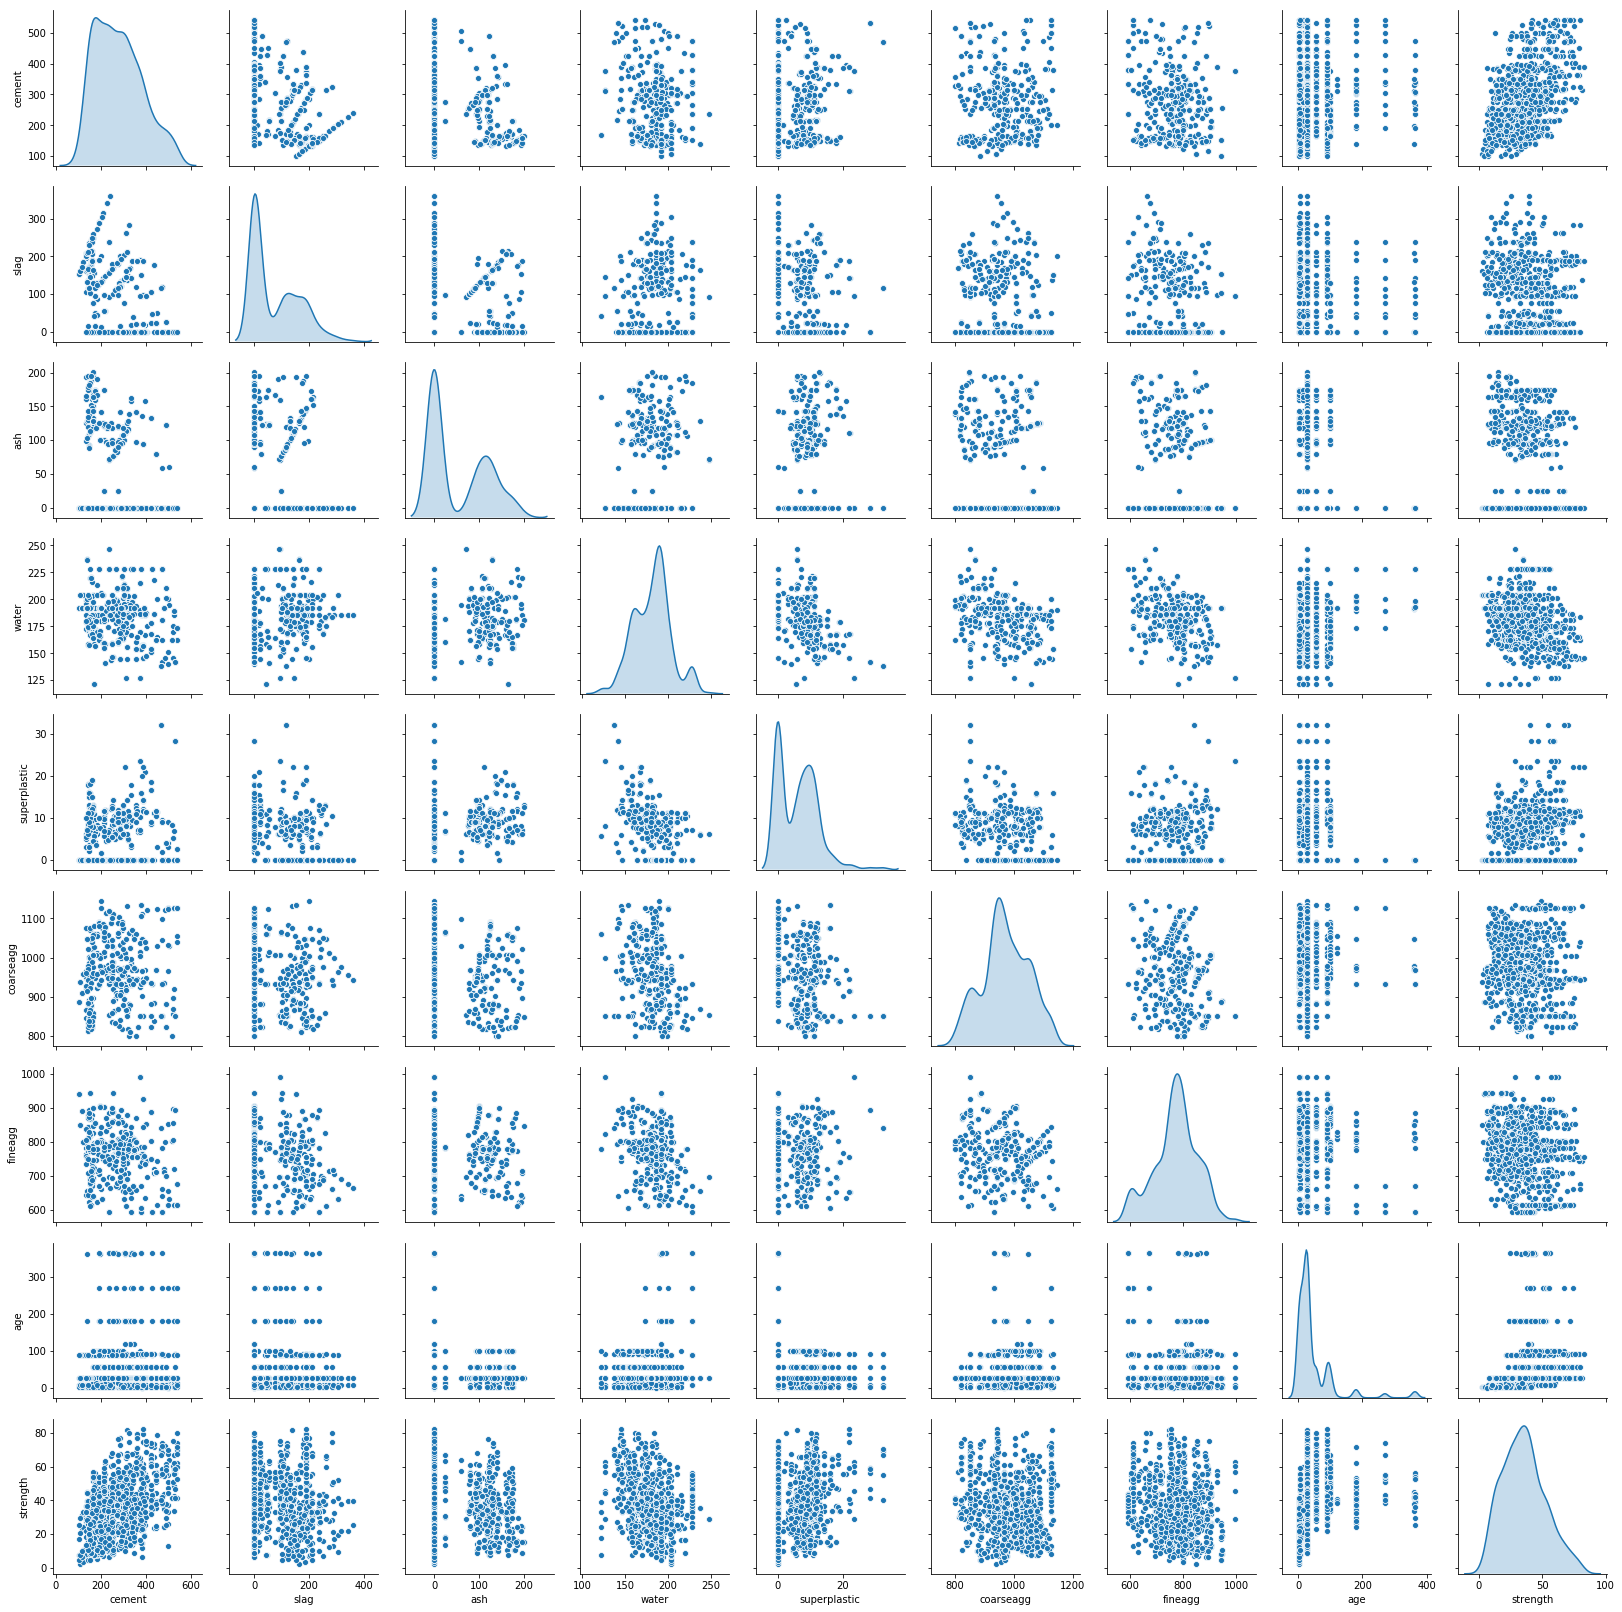

In [16]:
sns.pairplot(df, diag_kind = 'kde')

#### Treating outliers

In [17]:
for i in df.columns:
    q1, q2, q3 = df[i].quantile([0.25,0.5,0.75])
    IQR = q3 - q1
    a = df[i] > q3 + 1.5*IQR
    b = df[i] < q1 - 1.5*IQR
    df[i] = np.where(a | b, df[i].median(), df[i])  

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null float64
strength        1030 non-null float64
dtypes: float64(9)
memory usage: 72.5 KB


#### Plotting box plot once again to confirm outlier treatment

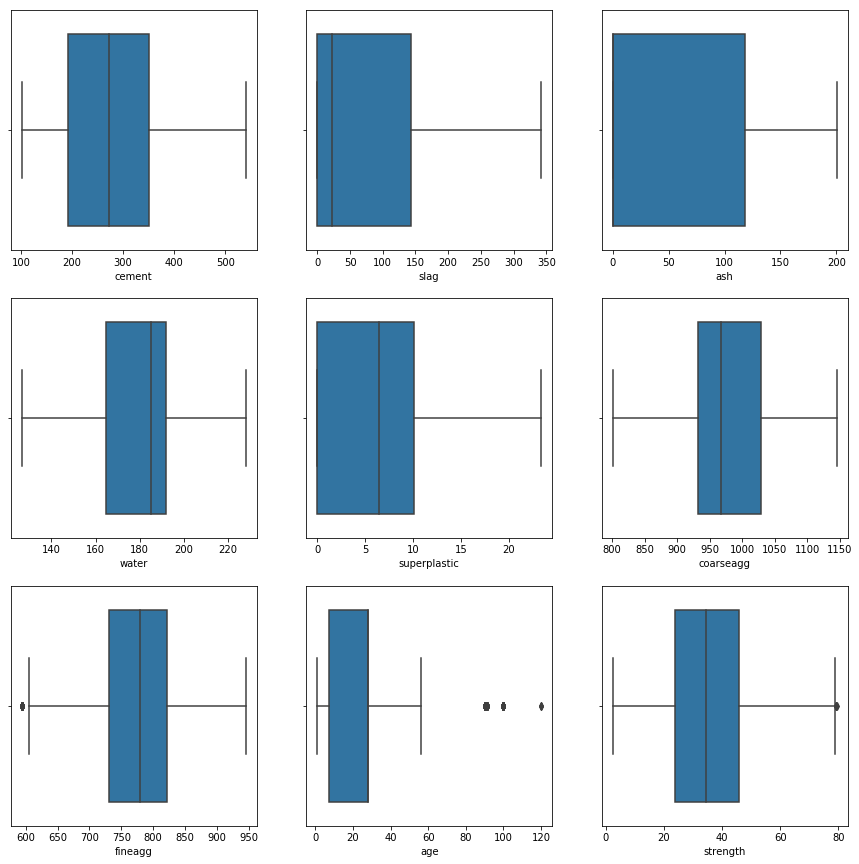

In [19]:
plt.figure(figsize=(15,15))
pos = 1
for i in df.columns:
    plt.subplot(3, 3, pos)
    sns.boxplot(df[i])
    pos += 1 


#### Since this is a regression problem with all numerical columns involved of different types, it will be better if we scale them.

In [20]:
df1 = df.drop(['strength'], axis =1)
df1.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0


In [21]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df1)
df_scaled = pd.DataFrame(scaled, columns = df1.columns)
df_scaled.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,-1.339017,1.625902,-0.847144,1.060879,-1.091166,-0.014398,-0.305676,-0.153159
1,-1.074790,-0.363717,1.096078,-1.134020,0.881615,1.388141,0.300692,-0.656933
2,-0.298384,-0.858192,0.648965,0.279067,-0.086509,-0.206121,1.126981,-0.153159
3,-0.145209,0.477594,-0.847144,2.250592,-1.091166,-0.526517,-1.303578,-0.153159
4,-1.209776,1.290784,-0.847144,0.565570,0.571085,0.958372,-0.964165,-0.153159


#### Defining our input X and target y

In [22]:
X = df_scaled
X.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,-1.339017,1.625902,-0.847144,1.060879,-1.091166,-0.014398,-0.305676,-0.153159
1,-1.074790,-0.363717,1.096078,-1.134020,0.881615,1.388141,0.300692,-0.656933
2,-0.298384,-0.858192,0.648965,0.279067,-0.086509,-0.206121,1.126981,-0.153159
3,-0.145209,0.477594,-0.847144,2.250592,-1.091166,-0.526517,-1.303578,-0.153159
4,-1.209776,1.290784,-0.847144,0.565570,0.571085,0.958372,-0.964165,-0.153159


In [23]:
y = df.strength
y.head()

0    29.89
1    23.51
2    29.22
3    45.85
4    18.29
Name: strength, dtype: float64

#### Splitting into training and test set

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

#### Applying Linear Regression first

In [25]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
linear_model.score(X_train, y_train)

0.7179307051307557

In [27]:
linear_model.score(X_test, y_test)

0.6620201671913022

#### Storing all computerd score in a dataframe for future reference

In [28]:
col_names =  ['Model Type', 'Training Score', 'Test Score']
model_comparison  = pd.DataFrame(columns = col_names)
model_comparison

,Model Type,Training Score,Test Score


In [29]:
model_comparison.loc[len(model_comparison)] = 'Linear Regression', round(linear_model.score(X_train, y_train)*100,2), round(linear_model.score(X_test, y_test)*100,2)
model_comparison

,Model Type,Training Score,Test Score
0,Linear Regression,71.79,66.2


#### Fininding out the feature importances

In [30]:
feature_importances = linear_model.coef_.ravel()
feature_names = X.columns
print(feature_names)
print(feature_importances)

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')
[10.29195332  5.25941775  2.03741062 -3.13073685  1.94474772 -0.7770168
 -0.7130753   8.60470074]


#### Plotting the feature importances

Text(0.5, 1.0, 'FEATURE IMPORTANCES')

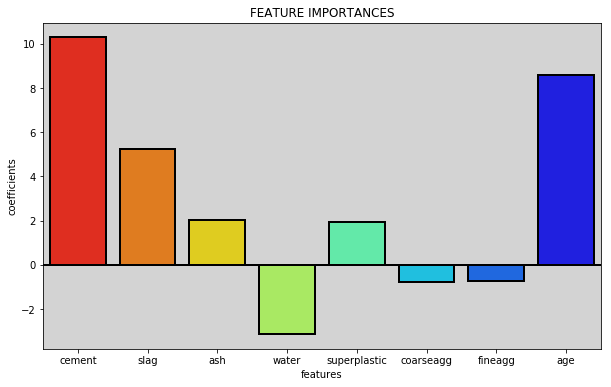

In [31]:
plt.figure(figsize=(10,6))
coef = pd.DataFrame(linear_model.coef_.ravel())
coef["feat"] = X_train.columns
ax1 = sns.barplot(coef["feat"],coef[0],palette="jet_r",
        linewidth=2,edgecolor="k"*coef["feat"].nunique())
ax1.set_facecolor("lightgrey")
ax1.axhline(0,color="k",linewidth=2)
plt.ylabel("coefficients")
plt.xlabel("features")
plt.title('FEATURE IMPORTANCES')

#### Applying PCA to see if we can remove some unimportant columns

In [32]:
pca = PCA(n_components = 8)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [33]:
print(pca.explained_variance_)

[2.1244081  1.39312159 1.28203921 1.02344799 0.94960474 0.91944264
 0.17952365 0.0420474 ]


In [34]:
print(pca.components_)

[[ 2.33895215e-01  1.88310880e-01 -4.76944667e-01  5.14660251e-01
  -4.85545628e-01 -5.88327665e-03 -4.18253101e-01 -8.21938273e-02]
 [-3.07847819e-01  7.27682746e-01 -5.87312906e-02  3.55699582e-02
   2.35224059e-01 -5.61831054e-01  4.83099657e-04  2.86885268e-03]
 [ 7.41050799e-01 -3.49454864e-03 -3.76279853e-01 -3.73613131e-01
   3.17163173e-01 -2.62112504e-01  1.85400362e-02 -4.36193463e-03]
 [-4.69513644e-02 -1.31160627e-01 -2.66182154e-01  1.17851816e-01
  -2.71942404e-01 -2.18730572e-01  5.46521311e-01  6.89470225e-01]
 [ 2.41521794e-02  2.22995438e-01  6.78212311e-02 -1.15251517e-01
   2.27379524e-01  3.59531795e-01 -5.11692307e-01  6.99295001e-01]
 [ 2.16461708e-01 -3.52242472e-01  4.93314855e-01  4.16756013e-01
   1.36384147e-01 -5.42316034e-01 -2.69925927e-01  1.62656473e-01]
 [ 1.87810634e-01  2.15480871e-01  4.10123669e-01 -4.95897932e-01
  -6.78061130e-01 -1.81812532e-01 -9.54385015e-02  4.74107308e-02]
 [-4.65242087e-01 -4.44485975e-01 -3.74798965e-01 -3.84057986e-01
  -

In [35]:
print(pca.explained_variance_ratio_)

[0.26844908 0.17604066 0.16200383 0.12932716 0.11999602 0.11618461
 0.02268536 0.00531329]


#### Plotting the feature importances

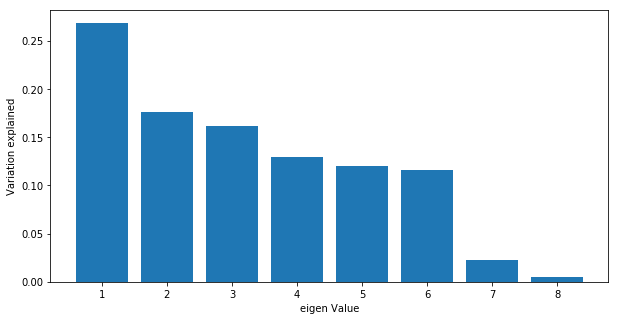

In [36]:
plt.figure(figsize = (10,5))
plt.bar(list(range(1,9)),pca.explained_variance_ratio_,tick_label=range(1,9), align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

#### Using elbow method to see the number of features that can explain more than 95% of the output

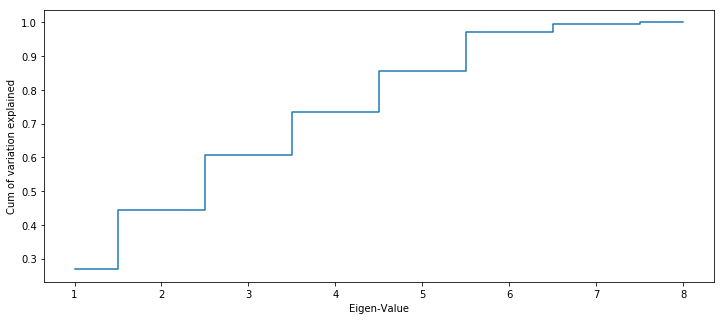

In [37]:
plt.figure(figsize = (12,5))
plt.xticks(np.arange(0,9))
plt.step(list(range(1,9)),np.cumsum(pca.explained_variance_ratio_), where = 'mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('Eigen-Value')
plt.show()

#### From the elbow method we found out 6 features are enough. PCA seemed not that much effective though in this case.

#### Running Linear Regression with 6 important features

In [38]:
pca6 = PCA(n_components = 6)
pca6.fit(X)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [39]:
Xpca6 = pca6.fit_transform(X)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(Xpca6,y, test_size = 0.3, random_state = 1)

In [41]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [42]:
linear_model.score(X_train, y_train)

0.6980560569404246

In [43]:
linear_model.score(X_test, y_test)

0.6290862546729372

In [44]:
model_comparison.loc[len(model_comparison)] = 'Linear Regression with PCA', round(linear_model.score(X_train, y_train)*100,2), round(linear_model.score(X_test, y_test)*100,2)
model_comparison

,Model Type,Training Score,Test Score
0,Linear Regression,71.79,66.20
1,Linear Regression with PCA,69.81,62.91


#### We see that the score with PCA was somewhat close to original Linear Regression with all features. But the score is not at al satisfactory, so let's try out other version of Linear Regression

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

#### Ridge Model

In [46]:
ridge = Ridge(alpha = 0.3)
ridge.fit(X_train, y_train)
print ("Ridge model:", (ridge.coef_))   

Ridge model: [10.25956935  5.22965947  2.01087277 -3.14752693  1.94655379 -0.79466937
 -0.73639799  8.6012287 ]


In [47]:
ridge.score(X_train, y_train)

0.7179299463133051

In [48]:
ridge.score(X_test, y_test)

0.6620182444445291

In [49]:
model_comparison.loc[len(model_comparison)] = 'Ridge Regression', round(ridge.score(X_train, y_train)*100,2), round(ridge.score(X_test, y_test)*100,2)
model_comparison

,Model Type,Training Score,Test Score
0,Linear Regression,71.79,66.20
1,Linear Regression with PCA,69.81,62.91
2,Ridge Regression,71.79,66.20


#### Not much improvement in the score. Let's print the Feature Importances though

In [50]:
feature_importances = ridge.coef_.ravel()
feature_names = X.columns
print(feature_names)
print(feature_importances)

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')
[10.25956935  5.22965947  2.01087277 -3.14752693  1.94655379 -0.79466937
 -0.73639799  8.6012287 ]


#### Plotting the feature importances

Text(0.5, 1.0, 'FEATURE IMPORTANCES')

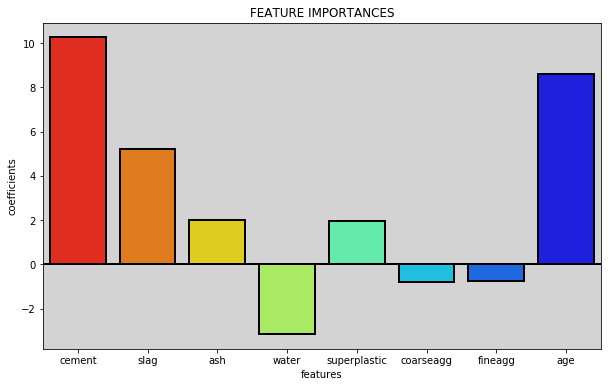

In [51]:
plt.figure(figsize=(10,6))
coef = pd.DataFrame(ridge.coef_.ravel())
coef["feat"] = X_train.columns
ax1 = sns.barplot(coef["feat"],coef[0],palette="jet_r",
        linewidth=2,edgecolor="k"*coef["feat"].nunique())
ax1.set_facecolor("lightgrey")
ax1.axhline(0,color="k",linewidth=2)
plt.ylabel("coefficients")
plt.xlabel("features")
plt.title('FEATURE IMPORTANCES')

#### Lasso

In [52]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [10.2504116   5.21948199  1.99081169 -3.12143195  1.96432416 -0.77796089
 -0.71791785  8.5926904 ]


In [53]:
lasso.score(X_train, y_train)

0.7179259724466335

In [54]:
lasso.score(X_test, y_test)

0.6618702029304555

In [55]:
model_comparison.loc[len(model_comparison)] = 'Lasso Regression', round(lasso.score(X_train, y_train)*100,2), round(lasso.score(X_test, y_test)*100,2)
model_comparison

,Model Type,Training Score,Test Score
0,Linear Regression,71.79,66.20
1,Linear Regression with PCA,69.81,62.91
2,Ridge Regression,71.79,66.20
3,Lasso Regression,71.79,66.19


#### Printing feature importances

In [56]:
feature_importances = lasso.coef_.ravel()
feature_names = X.columns
print(feature_names)
print(feature_importances)

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')
[10.2504116   5.21948199  1.99081169 -3.12143195  1.96432416 -0.77796089
 -0.71791785  8.5926904 ]


#### Plotting feature importances

Text(0.5, 1.0, 'FEATURE IMPORTANCES')

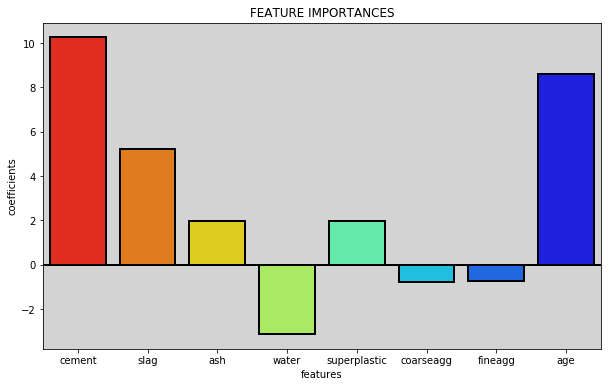

In [57]:
plt.figure(figsize=(10,6))
coef = pd.DataFrame(lasso.coef_.ravel())
coef["feat"] = X_train.columns
ax1 = sns.barplot(coef["feat"],coef[0],palette="jet_r",
        linewidth=2,edgecolor="k"*coef["feat"].nunique())
ax1.set_facecolor("lightgrey")
ax1.axhline(0,color="k",linewidth=2)
plt.ylabel("coefficients")
plt.xlabel("features")
plt.title('FEATURE IMPORTANCES')

#### The score was not good with Ridge and Lasso even, let's try polynomial Regression

#### Running polynomial with degree 2

In [58]:
poly = PolynomialFeatures(degree = 2, interaction_only = True)

In [59]:
X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

(721, 37)

In [60]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [61]:
print(linear_model.score(X_train, y_train))
print(linear_model.score(X_test, y_test))

0.775443712989279
0.7250960202021189


In [62]:
model_comparison.loc[len(model_comparison)] = 'Linear Regression with 2nd Degree Polynomial', round(linear_model.score(X_train, y_train)*100,2), round(linear_model.score(X_test, y_test)*100,2)
model_comparison

,Model Type,Training Score,Test Score
0,Linear Regression,71.79,66.20
1,Linear Regression with PCA,69.81,62.91
2,Ridge Regression,71.79,66.20
3,Lasso Regression,71.79,66.19
4,Linear Regression with 2nd Degree Polynomial,77.54,72.51


#### The score increased. Let's check with Ridge with degree 2 now.

In [63]:
ridge = Ridge(alpha = 0.3)
ridge.fit(X_train, y_train)
print ("Ridge model:", (ridge.coef_)) 

Ridge model: [ 0.         11.55975802  7.58011436  2.82425866 -2.65704063  2.17629587
 -0.04963823  0.44345904  8.48428353  1.49657243  1.27373028 -2.68180236
 -2.8816678   1.38620482  1.04260878  1.4400771   1.6979945  -1.27581872
 -1.27090111  1.32253842  2.11139616  2.38056232 -4.51357767 -4.66855523
  0.15408989  0.46768374  1.91969028  0.71048811 -1.94290721 -0.88355904
 -0.62203971 -0.62275524 -0.51056672 -0.34291963  1.52669067  0.33427768
  0.40122964]


In [64]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.7754393039339438
0.7249839796534759


In [65]:
model_comparison.loc[len(model_comparison)] = 'Ridge Regression with 2nd Degree Polynomial', round(ridge.score(X_train, y_train)*100,2), round(ridge.score(X_test, y_test)*100,2)
model_comparison

,Model Type,Training Score,Test Score
0,Linear Regression,71.79,66.20
1,Linear Regression with PCA,69.81,62.91
2,Ridge Regression,71.79,66.20
3,Lasso Regression,71.79,66.19
4,Linear Regression with 2nd Degree Polynomial,77.54,72.51
5,Ridge Regression with 2nd Degree Polynomial,77.54,72.50


#### Lasso with degree 2

In [66]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.         11.30531859  7.27174506  2.60114096 -2.79716315  2.17008486
 -0.1819945   0.24374611  8.54208089  1.35723281  1.0946369  -2.43754755
 -2.40177378  1.302228    0.97937649  1.06403359  1.48022692 -1.01757149
 -0.77944102  1.26747021  2.07063682  2.01383689 -4.23172598 -4.24004974
  0.04273723  0.39648831  1.60688661  0.85205271 -1.78890473 -0.75196929
 -0.81283885 -0.2874108  -0.13341219 -0.28528168  1.53196924  0.09809563
  0.07499801]


In [67]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.7751814426544539
0.7223944150895144


In [68]:
model_comparison.loc[len(model_comparison)] = 'Lasso Regression with 2nd Degree Polynomial', round(lasso.score(X_train, y_train)*100,2), round(lasso.score(X_test, y_test)*100,2)
model_comparison

,Model Type,Training Score,Test Score
0,Linear Regression,71.79,66.20
1,Linear Regression with PCA,69.81,62.91
2,Ridge Regression,71.79,66.20
3,Lasso Regression,71.79,66.19
4,Linear Regression with 2nd Degree Polynomial,77.54,72.51
5,Ridge Regression with 2nd Degree Polynomial,77.54,72.50
6,Lasso Regression with 2nd Degree Polynomial,77.52,72.24


#### The ploynomial function with degree 2 increased the score. Let's increase the degree further to cubic (3) and check

In [69]:
poly = PolynomialFeatures(degree = 3, interaction_only = True)

In [70]:
X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

(721, 93)

In [71]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [72]:
print(linear_model.score(X_train, y_train))
print(linear_model.score(X_test, y_test))

0.8164202277243655
0.7471849154417676


In [73]:
model_comparison.loc[len(model_comparison)] = 'Linear Regression with 3rd Degree Polynomial', round(linear_model.score(X_train, y_train)*100,2), round(linear_model.score(X_test, y_test)*100,2)
model_comparison

,Model Type,Training Score,Test Score
0,Linear Regression,71.79,66.20
1,Linear Regression with PCA,69.81,62.91
2,Ridge Regression,71.79,66.20
3,Lasso Regression,71.79,66.19
4,Linear Regression with 2nd Degree Polynomial,77.54,72.51
5,Ridge Regression with 2nd Degree Polynomial,77.54,72.50
6,Lasso Regression with 2nd Degree Polynomial,77.52,72.24
7,Linear Regression with 3rd Degree Polynomial,81.64,74.72


In [74]:
ridge = Ridge(alpha = 0.3)
ridge.fit(X_train, y_train)
print ("Ridge model:", (ridge.coef_)) 

Ridge model: [ 0.00000000e+00  1.24228979e+01  7.28770576e+00  3.69545498e+00
 -1.74894220e+00  2.56994226e+00 -1.21375805e-01  2.16778575e+00
  8.65031220e+00 -9.81193823e-01  6.91395719e-01  3.27194380e-01
  2.10653222e+00  4.38780103e-01  2.41000934e+00  1.31039737e+00
  1.49456338e+00 -5.84516653e-01  7.74522441e-01 -4.83855603e-01
  1.71275114e+00  2.06983913e+00 -1.49179101e+00 -2.85600237e+00
 -8.44293625e-01  7.20702036e-01  2.29815208e+00  8.72407047e-01
 -2.68953374e+00 -4.51761167e-01 -2.34646138e+00  1.36074779e+00
  2.01782360e+00 -1.03462540e+00  1.20382458e+00  1.73857726e-02
 -3.42709668e-01 -4.03581971e-01  6.03130477e-01 -5.06813242e-01
 -2.56676923e+00 -2.58371368e-01 -2.59886674e-01  8.06931223e-01
 -1.90623741e+00 -1.26113989e+00  7.15806123e-01  5.38627219e-01
  3.17287654e+00  1.49712468e+00  1.60288410e+00  1.58450029e+00
  1.73542610e+00  5.37499020e-01  1.90301670e+00 -5.71760504e-01
  1.87374158e-01  3.48615874e-01  1.23884220e+00 -1.67816356e+00
 -8.68961792

In [75]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.8164050488253725
0.7475712131231265


In [76]:
model_comparison.loc[len(model_comparison)] = 'Ridge Regression with 3rd Degree Polynomial', round(ridge.score(X_train, y_train)*100,2), round(ridge.score(X_test, y_test)*100,2)
model_comparison

,Model Type,Training Score,Test Score
0,Linear Regression,71.79,66.20
1,Linear Regression with PCA,69.81,62.91
2,Ridge Regression,71.79,66.20
3,Lasso Regression,71.79,66.19
4,Linear Regression with 2nd Degree Polynomial,77.54,72.51
5,Ridge Regression with 2nd Degree Polynomial,77.54,72.50
6,Lasso Regression with 2nd Degree Polynomial,77.52,72.24
7,Linear Regression with 3rd Degree Polynomial,81.64,74.72
8,Ridge Regression with 3rd Degree Polynomial,81.64,74.76


In [77]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.00000000e+00  1.26174113e+01  7.49545811e+00  3.87590073e+00
 -1.67018342e+00  2.52516203e+00 -9.26228858e-03  2.29353453e+00
  8.66558619e+00 -8.85082494e-01  7.53981937e-01  3.29536359e-01
  2.05641930e+00  4.76047803e-01  2.44340965e+00  1.32524938e+00
  1.59768389e+00 -5.47056858e-01  7.17358699e-01 -4.33319667e-01
  1.76291626e+00  2.08763219e+00 -1.49146210e+00 -2.88741114e+00
 -8.14288149e-01  7.50675092e-01  2.30570881e+00  8.54657949e-01
 -2.68754297e+00 -4.54105966e-01 -2.32457478e+00  1.32420161e+00
  1.96725979e+00 -1.00359881e+00  1.21198932e+00  1.94294359e-02
 -3.27676083e-01 -3.16883781e-01  6.11719419e-01 -5.43949318e-01
 -2.50093096e+00 -2.11723173e-01 -2.54130194e-01  8.08225040e-01
 -1.93202215e+00 -1.21390261e+00  7.47178330e-01  5.55010841e-01
  3.18323421e+00  1.49467252e+00  1.59917292e+00  1.55102338e+00
  1.70620471e+00  5.22421087e-01  1.85355484e+00 -5.57898771e-01
  1.87955339e-01  3.51373059e-01  1.26908407e+00 -1.70133244e+00
 -4.28797626

In [78]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.8164101553230764
0.7478032314429711


In [79]:
model_comparison.loc[len(model_comparison)] = 'Lasso Regression with 3rd Degree Polynomial', round(lasso.score(X_train, y_train)*100,2), round(lasso.score(X_test, y_test)*100,2)
model_comparison

,Model Type,Training Score,Test Score
0,Linear Regression,71.79,66.20
1,Linear Regression with PCA,69.81,62.91
2,Ridge Regression,71.79,66.20
3,Lasso Regression,71.79,66.19
4,Linear Regression with 2nd Degree Polynomial,77.54,72.51
5,Ridge Regression with 2nd Degree Polynomial,77.54,72.50
6,Lasso Regression with 2nd Degree Polynomial,77.52,72.24
7,Linear Regression with 3rd Degree Polynomial,81.64,74.72
8,Ridge Regression with 3rd Degree Polynomial,81.64,74.76
9,Lasso Regression with 3rd Degree Polynomial,81.64,74.78


#### We saw a significant increase in the overall scores with 3rd degree polynomials. Let us further see if we colud increase scores using other popular regression techniques.

#### Let's redefine traing and test set as we have distorted the features for the above algorithms

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
X_train.shape

(721, 8)

#### Decision Tree Regressor

In [81]:
dt_model = DecisionTreeRegressor(max_depth = 9, min_samples_split = 8, random_state = 0)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=9, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=8, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [82]:
print(dt_model.score(X_train, y_train))
print(dt_model.score(X_test, y_test))

0.9391626057166099
0.8207905653875531


In [83]:
model_comparison.loc[len(model_comparison)] = 'Decision Tree Regressor', round(dt_model.score(X_train, y_train)*100,2), round(dt_model.score(X_test, y_test)*100,2)
model_comparison

,Model Type,Training Score,Test Score
0,Linear Regression,71.79,66.20
1,Linear Regression with PCA,69.81,62.91
2,Ridge Regression,71.79,66.20
3,Lasso Regression,71.79,66.19
4,Linear Regression with 2nd Degree Polynomial,77.54,72.51
5,Ridge Regression with 2nd Degree Polynomial,77.54,72.50
6,Lasso Regression with 2nd Degree Polynomial,77.52,72.24
7,Linear Regression with 3rd Degree Polynomial,81.64,74.72
8,Ridge Regression with 3rd Degree Polynomial,81.64,74.76
9,Lasso Regression with 3rd Degree Polynomial,81.64,74.78


#### That's a significant increase in the scores. Let's print the feature importances.

In [84]:
feature_importances = dt_model.feature_importances_
feature_names = X.columns
print(feature_names)
print(feature_importances)

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')
[0.36016513 0.08947876 0.01075704 0.12958889 0.01745741 0.02026138
 0.03371966 0.33857172]


#### That's a significant increase in the scores. Let's print the feature importances.Plotting the feature importances

Text(0.5, 1.0, 'FEATURE IMPORTANCES')

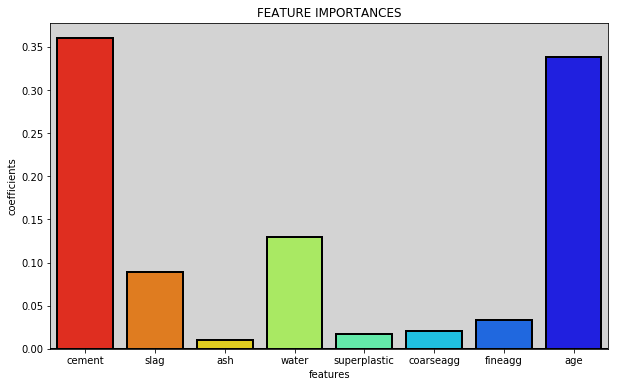

In [85]:
plt.figure(figsize = (10,6))
coef = pd.DataFrame(dt_model.feature_importances_)
coef["feat"] = X_train.columns
ax1 = sns.barplot(coef["feat"],coef[0],palette="jet_r",
    linewidth=2,edgecolor="k"*coef["feat"].nunique())
ax1.set_facecolor("lightgrey")
ax1.axhline(0,color="k",linewidth=2)
plt.ylabel("coefficients")
plt.xlabel("features")
plt.title('FEATURE IMPORTANCES')

#### That's a significant increase in the scores. Let's print the feature importances.Applying KNeighbours Regressor

In [86]:
knn = KNeighborsRegressor(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

In [87]:
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.8754598276618634
0.7895881598773955


In [88]:
model_comparison.loc[len(model_comparison)] = 'KNN Regressor', round(knn.score(X_train, y_train)*100,2), round(knn.score(X_test, y_test)*100,2)
model_comparison

,Model Type,Training Score,Test Score
0,Linear Regression,71.79,66.20
1,Linear Regression with PCA,69.81,62.91
2,Ridge Regression,71.79,66.20
3,Lasso Regression,71.79,66.19
4,Linear Regression with 2nd Degree Polynomial,77.54,72.51
5,Ridge Regression with 2nd Degree Polynomial,77.54,72.50
6,Lasso Regression with 2nd Degree Polynomial,77.52,72.24
7,Linear Regression with 3rd Degree Polynomial,81.64,74.72
8,Ridge Regression with 3rd Degree Polynomial,81.64,74.76
9,Lasso Regression with 3rd Degree Polynomial,81.64,74.78


In [89]:
X_train.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
185,0.658961,-0.858192,-0.847144,1.036599,-1.091166,0.013910,0.031195,-0.656933
286,0.888723,1.358745,-0.847144,-0.561016,0.753750,-0.602435,-0.201437,2.113827
600,-0.039901,-0.858192,-0.847144,0.453882,-1.091166,-0.063294,1.060878,-1.052756
691,0.946164,0.254963,-0.847144,2.250592,-1.091166,-0.526517,-2.269700,-0.908821
474,0.716401,-0.858192,1.372788,0.551002,0.918148,-2.212138,0.069332,-0.153159


#### That's a significant increase in the scores. Let's print the feature importances.Applying SVR to check if the score can be further increased

In [90]:
svr = SVR(C = 6, gamma = 'auto')
svr.fit(X_train, y_train)

SVR(C=6, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [91]:
print(svr.score(X_train, y_train))
print(svr.score(X_test, y_test))

0.8603558342448874
0.8245525399458812


In [92]:
model_comparison.loc[len(model_comparison)] = 'SVR', round(svr.score(X_train, y_train)*100,2), round(svr.score(X_test, y_test)*100,2)
model_comparison

,Model Type,Training Score,Test Score
0,Linear Regression,71.79,66.20
1,Linear Regression with PCA,69.81,62.91
2,Ridge Regression,71.79,66.20
3,Lasso Regression,71.79,66.19
4,Linear Regression with 2nd Degree Polynomial,77.54,72.51
5,Ridge Regression with 2nd Degree Polynomial,77.54,72.50
6,Lasso Regression with 2nd Degree Polynomial,77.52,72.24
7,Linear Regression with 3rd Degree Polynomial,81.64,74.72
8,Ridge Regression with 3rd Degree Polynomial,81.64,74.76
9,Lasso Regression with 3rd Degree Polynomial,81.64,74.78


#### That's a significant increase in the scores. Let's print the feature importances.We got the best score as of now. Let's try ensemble techniques further to find areas of improvement

#### That's a significant increase in the scores. Let's print the feature importances.Random Forest Regressor

In [93]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

C:\Users\Souvik Saha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [94]:
print(rfr.score(X_train, y_train))
print(rfr.score(X_test, y_test))

0.9711390673231367
0.851994178274978


In [95]:
model_comparison.loc[len(model_comparison)] = 'Random Forest Regressor', round(rfr.score(X_train, y_train)*100,2), round(rfr.score(X_test, y_test)*100,2)
model_comparison

,Model Type,Training Score,Test Score
0,Linear Regression,71.79,66.20
1,Linear Regression with PCA,69.81,62.91
2,Ridge Regression,71.79,66.20
3,Lasso Regression,71.79,66.19
4,Linear Regression with 2nd Degree Polynomial,77.54,72.51
5,Ridge Regression with 2nd Degree Polynomial,77.54,72.50
6,Lasso Regression with 2nd Degree Polynomial,77.52,72.24
7,Linear Regression with 3rd Degree Polynomial,81.64,74.72
8,Ridge Regression with 3rd Degree Polynomial,81.64,74.76
9,Lasso Regression with 3rd Degree Polynomial,81.64,74.78


#### Random Forest worked well with this dataset. Let's print the feature importances

In [96]:
feature_importances = rfr.feature_importances_
feature_names = X.columns
print(feature_names)
print(feature_importances)

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')
[0.35121134 0.0726858  0.0183154  0.08994407 0.06810978 0.03922378
 0.03500351 0.32550632]


#### Plotting the feature importances

Text(0.5, 1.0, 'FEATURE IMPORTANCES')

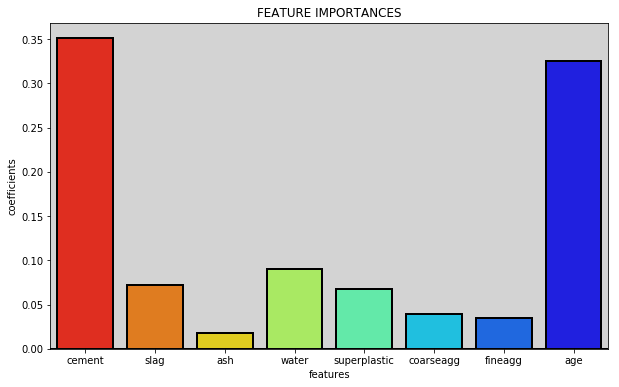

In [97]:
plt.figure(figsize = (10,6))
coef = pd.DataFrame(rfr.feature_importances_)
coef["feat"] = X_train.columns
ax1 = sns.barplot(coef["feat"],coef[0],palette="jet_r",
    linewidth=2,edgecolor="k"*coef["feat"].nunique())
ax1.set_facecolor("lightgrey")
ax1.axhline(0,color="k",linewidth=2)
plt.ylabel("coefficients")
plt.xlabel("features")
plt.title('FEATURE IMPORTANCES')

#### Applying Bagging Regressor

In [98]:
bagging = BaggingRegressor(random_state = 5)
bagging.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=5,
         verbose=0, warm_start=False)

In [99]:
print(bagging.score(X_train, y_train))
print(bagging.score(X_test, y_test))

0.9677471098699797
0.8674456253964469


In [100]:
model_comparison.loc[len(model_comparison)] = 'Bagging Regressor', round(bagging.score(X_train, y_train)*100,2), round(bagging.score(X_test, y_test)*100,2)
model_comparison

,Model Type,Training Score,Test Score
0,Linear Regression,71.79,66.20
1,Linear Regression with PCA,69.81,62.91
2,Ridge Regression,71.79,66.20
3,Lasso Regression,71.79,66.19
4,Linear Regression with 2nd Degree Polynomial,77.54,72.51
5,Ridge Regression with 2nd Degree Polynomial,77.54,72.50
6,Lasso Regression with 2nd Degree Polynomial,77.52,72.24
7,Linear Regression with 3rd Degree Polynomial,81.64,74.72
8,Ridge Regression with 3rd Degree Polynomial,81.64,74.76
9,Lasso Regression with 3rd Degree Polynomial,81.64,74.78


#### Bagging Regressor was again very effective. Let's check with Gradient Boosting Regressor

In [101]:
gradboost = GradientBoostingRegressor(random_state = 8)
gradboost.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=8, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [102]:
print(gradboost.score(X_train, y_train))
print(gradboost.score(X_test, y_test))

0.9408958671842914
0.8661417205906894


In [103]:
model_comparison.loc[len(model_comparison)] = 'Gradient Boosting Regressor', round(gradboost.score(X_train, y_train)*100,2), round(gradboost.score(X_test, y_test)*100,2)
model_comparison

,Model Type,Training Score,Test Score
0,Linear Regression,71.79,66.20
1,Linear Regression with PCA,69.81,62.91
2,Ridge Regression,71.79,66.20
3,Lasso Regression,71.79,66.19
4,Linear Regression with 2nd Degree Polynomial,77.54,72.51
5,Ridge Regression with 2nd Degree Polynomial,77.54,72.50
6,Lasso Regression with 2nd Degree Polynomial,77.52,72.24
7,Linear Regression with 3rd Degree Polynomial,81.64,74.72
8,Ridge Regression with 3rd Degree Polynomial,81.64,74.76
9,Lasso Regression with 3rd Degree Polynomial,81.64,74.78


#### This is working well too. Trying to print out the feature importances

In [104]:
feature_importances = gradboost.feature_importances_
feature_names = X.columns
print(feature_names)
print(feature_importances)

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')
[0.32362397 0.0752078  0.0173641  0.11443455 0.05038077 0.01818238
 0.02981276 0.37099367]


#### Plotting the feature importances

Text(0.5, 1.0, 'FEATURE IMPORTANCES')

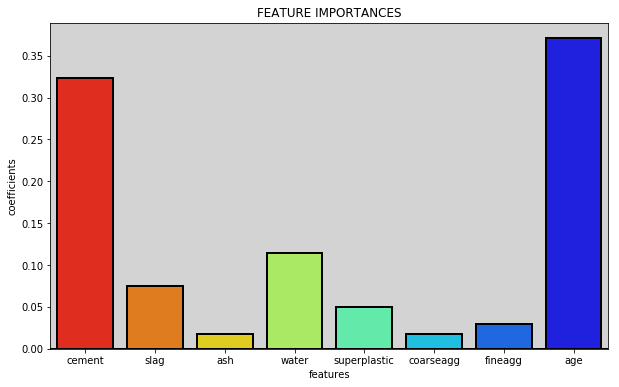

In [105]:
plt.figure(figsize = (10,6))
coef = pd.DataFrame(gradboost.feature_importances_)
coef["feat"] = X_train.columns
ax1 = sns.barplot(coef["feat"],coef[0],palette="jet_r",
    linewidth=2,edgecolor="k"*coef["feat"].nunique())
ax1.set_facecolor("lightgrey")
ax1.axhline(0,color="k",linewidth=2)
plt.ylabel("coefficients")
plt.xlabel("features")
plt.title('FEATURE IMPORTANCES')

#### Applying ADA Boosting Regressor

In [106]:
adaboost = AdaBoostRegressor(n_estimators=50, random_state = 9)
adaboost.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=9)

In [107]:
print(adaboost.score(X_train, y_train))
print(adaboost.score(X_test, y_test))

0.7825141006870917
0.7300480644107401


In [108]:
model_comparison.loc[len(model_comparison)] = 'Ada Boosting Regressor', round(adaboost.score(X_train, y_train)*100,2), round(adaboost.score(X_test, y_test)*100,2)
model_comparison

,Model Type,Training Score,Test Score
0,Linear Regression,71.79,66.20
1,Linear Regression with PCA,69.81,62.91
2,Ridge Regression,71.79,66.20
3,Lasso Regression,71.79,66.19
4,Linear Regression with 2nd Degree Polynomial,77.54,72.51
5,Ridge Regression with 2nd Degree Polynomial,77.54,72.50
6,Lasso Regression with 2nd Degree Polynomial,77.52,72.24
7,Linear Regression with 3rd Degree Polynomial,81.64,74.72
8,Ridge Regression with 3rd Degree Polynomial,81.64,74.76
9,Lasso Regression with 3rd Degree Polynomial,81.64,74.78


#### Ada Boosting Regressor seemed not to be very effective. Still let's print out the feature importances.

In [109]:
feature_importances = adaboost.feature_importances_
feature_names = X.columns
print(feature_names)
print(feature_importances)

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')
[0.35503816 0.05138734 0.00660114 0.17215219 0.06960717 0.00955775
 0.02181496 0.31384129]


#### Plotting the feature importances

Text(0.5, 1.0, 'FEATURE IMPORTANCES')

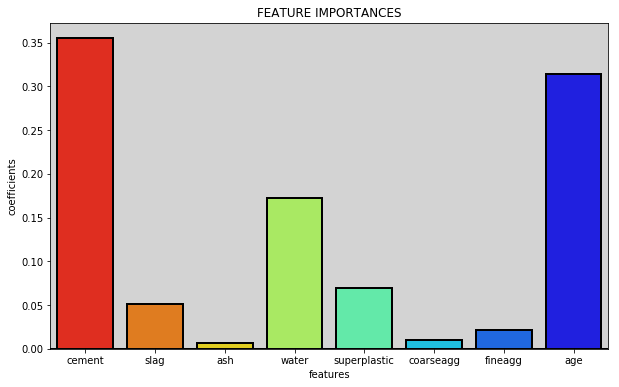

In [110]:
plt.figure(figsize = (10,6))
coef = pd.DataFrame(adaboost.feature_importances_)
coef["feat"] = X_train.columns
ax1 = sns.barplot(coef["feat"],coef[0],palette="jet_r",
    linewidth=2,edgecolor="k"*coef["feat"].nunique())
ax1.set_facecolor("lightgrey")
ax1.axhline(0,color="k",linewidth=2)
plt.ylabel("coefficients")
plt.xlabel("features")
plt.title('FEATURE IMPORTANCES')

#### Printing out the model comparison dataframe

In [111]:
model_comparison

,Model Type,Training Score,Test Score
0,Linear Regression,71.79,66.20
1,Linear Regression with PCA,69.81,62.91
2,Ridge Regression,71.79,66.20
3,Lasso Regression,71.79,66.19
4,Linear Regression with 2nd Degree Polynomial,77.54,72.51
5,Ridge Regression with 2nd Degree Polynomial,77.54,72.50
6,Lasso Regression with 2nd Degree Polynomial,77.52,72.24
7,Linear Regression with 3rd Degree Polynomial,81.64,74.72
8,Ridge Regression with 3rd Degree Polynomial,81.64,74.76
9,Lasso Regression with 3rd Degree Polynomial,81.64,74.78


#### From the above table, we see that four algorithms, mainly
#### 1. SVR
#### 2. Random Forest Regressor
#### 3. Bagging Regressor
#### 4. Gradient Boosting Regressor

#### were effective.
#### We will try to tune the hyper parameters of the four best algorithms mentioned above to get enhance the performance further.

#### Setting the parameters for GridSearch CV on SVR algorithm

In [112]:
parameters = {'kernel': ['rbf', 'poly', 'linear'], 'C': list(range(1,100,5)), 'gamma':['auto']}
svrgs = GridSearchCV(SVR(), param_grid = parameters, cv = 10)

In [113]:
svrgs.fit(X_train, y_train)

C:\Users\Souvik Saha\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ['rbf', 'poly', 'linear'], 'C': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96], 'gamma': ['auto']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [114]:
print(svrgs.score(X_train, y_train))
print(svrgs.score(X_test, y_test))

0.9155414037286077
0.8587642602826296


#### Printing out the best parameters

In [115]:
svrgs.best_params_

{'C': 46, 'gamma': 'auto', 'kernel': 'rbf'}

In [116]:
model_comparison.loc[len(model_comparison)] = 'SVR with GridSearch', round(svrgs.score(X_train, y_train)*100,2), round(svrgs.score(X_test, y_test)*100,2)
model_comparison

,Model Type,Training Score,Test Score
0,Linear Regression,71.79,66.20
1,Linear Regression with PCA,69.81,62.91
2,Ridge Regression,71.79,66.20
3,Lasso Regression,71.79,66.19
4,Linear Regression with 2nd Degree Polynomial,77.54,72.51
5,Ridge Regression with 2nd Degree Polynomial,77.54,72.50
6,Lasso Regression with 2nd Degree Polynomial,77.52,72.24
7,Linear Regression with 3rd Degree Polynomial,81.64,74.72
8,Ridge Regression with 3rd Degree Polynomial,81.64,74.76
9,Lasso Regression with 3rd Degree Polynomial,81.64,74.78


#### There was no such improvement with GridSearch on SVM. Let's try out Grid Search on Random Forest Algorithm

#### Setting the parameters for Random Forest Algorithm

In [117]:
parameters = { 'max_depth': [3,5,7,8,10,15],
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 20, 30, 50, 70, 80, 100]}
rfrgs = GridSearchCV(RandomForestRegressor(), param_grid = parameters, cv = 10)

In [118]:
rfrgs.fit(X_train, y_train)

C:\Users\Souvik Saha\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [3, 5, 7, 8, 10, 15], 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10], 'n_estimators': [10, 20, 30, 50, 70, 80, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [119]:
print(rfrgs.score(X_train, y_train))
print(rfrgs.score(X_test, y_test))

0.9765750842839133
0.875236886890067


#### Printing out the best parameters

In [120]:
rfrgs.best_params_

{'max_depth': 15,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [121]:
model_comparison.loc[len(model_comparison)] = 'Random Forest Regressor with GridSearch', round(rfrgs.score(X_train, y_train)*100,2), round(rfrgs.score(X_test, y_test)*100,2)
model_comparison

,Model Type,Training Score,Test Score
0,Linear Regression,71.79,66.20
1,Linear Regression with PCA,69.81,62.91
2,Ridge Regression,71.79,66.20
3,Lasso Regression,71.79,66.19
4,Linear Regression with 2nd Degree Polynomial,77.54,72.51
5,Ridge Regression with 2nd Degree Polynomial,77.54,72.50
6,Lasso Regression with 2nd Degree Polynomial,77.52,72.24
7,Linear Regression with 3rd Degree Polynomial,81.64,74.72
8,Ridge Regression with 3rd Degree Polynomial,81.64,74.76
9,Lasso Regression with 3rd Degree Polynomial,81.64,74.78


#### GridSearch on Random Forest showed a slight improvement.

#### Applying GridSearch on Bagging Regressor

In [123]:
parameters ={'n_estimators': [10, 20, 30, 50, 70, 80, 100],
            'max_samples': [0.1, 0.2, 0.5, 1.0],
            'bootstrap': [True, False],
            'bootstrap_features': [True, False]}

In [124]:
bagginggs = GridSearchCV(BaggingRegressor(), param_grid = parameters, cv = 10)
bagginggs.fit(X_train, y_train)

C:\Users\Souvik Saha\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 20, 30, 50, 70, 80, 100], 'max_samples': [0.1, 0.2, 0.5, 1.0], 'bootstrap': [True, False], 'bootstrap_features': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [125]:
print(bagginggs.score(X_train, y_train))
print(bagginggs.score(X_test, y_test))

0.9770785164432929
0.881133159796906


#### Printing out the best parameters

In [126]:
bagginggs.best_params_

{'bootstrap': True,
 'bootstrap_features': False,
 'max_samples': 1.0,
 'n_estimators': 80}

In [127]:
model_comparison.loc[len(model_comparison)] = 'Bagging Regressor with GridSearch', round(bagginggs.score(X_train, y_train)*100,2), round(bagginggs.score(X_test, y_test)*100,2)
model_comparison

,Model Type,Training Score,Test Score
0,Linear Regression,71.79,66.20
1,Linear Regression with PCA,69.81,62.91
2,Ridge Regression,71.79,66.20
3,Lasso Regression,71.79,66.19
4,Linear Regression with 2nd Degree Polynomial,77.54,72.51
5,Ridge Regression with 2nd Degree Polynomial,77.54,72.50
6,Lasso Regression with 2nd Degree Polynomial,77.52,72.24
7,Linear Regression with 3rd Degree Polynomial,81.64,74.72
8,Ridge Regression with 3rd Degree Polynomial,81.64,74.76
9,Lasso Regression with 3rd Degree Polynomial,81.64,74.78


#### Again a slight improvement on both training and test data

#### Setting the parameters to apply Randomized Search on Gradient Boosting Regressor

In [128]:
parameters = {'n_estimators': [10, 20, 30, 50, 70, 80, 100],
              'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5],
              'min_samples_split': [1.0, 2, 3, 5, 10],
              'min_samples_leaf': [1, 2, 3, 5, 10],
              'max_depth': [3, 5, 8],
              'max_features': ['log2', 'sqrt'],
              'criterion' : ['friedman_mse', 'mae'],
              'loss' : ['ls', 'lad', 'huber', 'quantile']
}

In [129]:
gradboostrs = RandomizedSearchCV(GradientBoostingRegressor(),n_iter = 40, param_distributions = parameters, cv = 10)
gradboostrs.fit(X_train, y_train)

C:\Users\Souvik Saha\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=40, n_jobs=None,
          param_distributions={'n_estimators': [10, 20, 30, 50, 70, 80, 100], 'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5], 'min_samples_split': [1.0, 2, 3, 5, 10], 'min_samples_leaf': [1, 2, 3, 5, 10], 'max_depth': [3, 5, 8], 'max_features': ['log2', 'sqrt'], 'criterion': ['friedman_mse', 'mae'], 'loss': ['ls', 'lad', 'huber', 'quantile']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, ve

In [130]:
gradboostrs.score(X_train, y_train)

0.9593892228682099

In [131]:
gradboostrs.score(X_test, y_test)

0.8788712522962437

#### Printing out the best parameters

In [132]:
gradboostrs.best_params_

{'n_estimators': 80,
 'min_samples_split': 2,
 'min_samples_leaf': 5,
 'max_features': 'log2',
 'max_depth': 5,
 'loss': 'huber',
 'learning_rate': 0.1,
 'criterion': 'friedman_mse'}

In [133]:
model_comparison.loc[len(model_comparison)] = 'Gradient Boosting Regressor with RandomizedSearch', round(gradboostrs.score(X_train, y_train)*100,2), round(gradboostrs.score(X_test, y_test)*100,2)
model_comparison

,Model Type,Training Score,Test Score
0,Linear Regression,71.79,66.20
1,Linear Regression with PCA,69.81,62.91
2,Ridge Regression,71.79,66.20
3,Lasso Regression,71.79,66.19
4,Linear Regression with 2nd Degree Polynomial,77.54,72.51
5,Ridge Regression with 2nd Degree Polynomial,77.54,72.50
6,Lasso Regression with 2nd Degree Polynomial,77.52,72.24
7,Linear Regression with 3rd Degree Polynomial,81.64,74.72
8,Ridge Regression with 3rd Degree Polynomial,81.64,74.76
9,Lasso Regression with 3rd Degree Polynomial,81.64,74.78


#### Radom Search on Gradient Boosting Regressor improved the performance significantly further. We got the best score in test set with this combination.

#### Let's use the best parameters found above to build the respective models and evaulate the Model performance range at 95% confidence level

#### Let's evaluate the model performance range for the best four models at 95% confidence level

#### Evaluating Model Performance Range for SVR

In [136]:
svrbp = SVR(C = 6, gamma = 'auto', kernel= 'rbf')

In [137]:
seed = 19
results = cross_val_score(svrbp, X_test, y_test, cv=20)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.79927893 0.68866557 0.80528782 0.89975366 0.77629588 0.78126548
 0.8741895  0.82122317 0.73551653 0.69096716 0.81531002 0.78159376
 0.8427018  0.58878846 0.7969061  0.7391692  0.70215992 0.681284
 0.8628524  0.80130337]
Accuracy: 77.423% (7.428%)


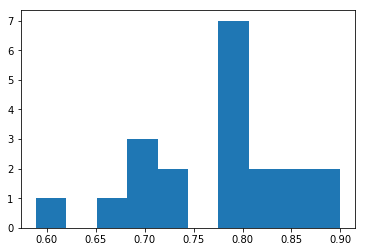

95.0 confidence interval 63.3% and 88.8%


In [138]:
# plot scores
plt.hist(results)
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(results, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(results, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

#### Evaluating Model Performance Reange for Random Forest Regressor

In [139]:
rfrbp = RandomForestRegressor(max_depth = 15, max_features = 'auto', min_samples_leaf = 1, min_samples_split = 2, n_estimators = 70)

In [140]:
seed = 29
results = cross_val_score(rfrbp, X_test, y_test, cv=10)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.74470879 0.73126782 0.84661792 0.88700417 0.83135566 0.84922391
 0.78437137 0.7240799  0.75625844 0.87831094]
Accuracy: 80.332% (5.905%)


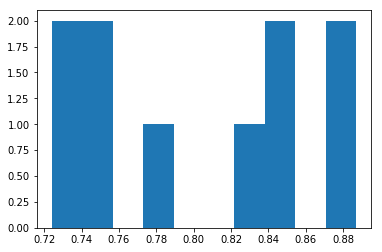

95.0 confidence interval 72.6% and 88.5%


In [141]:
# plot scores
plt.hist(results)
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(results, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(results, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

#### Evaluating Model Performance Reange for Bagging Regressor

In [142]:
baggingbp = BaggingRegressor(bootstrap = True, bootstrap_features = False, max_samples = 1.0, n_estimators = 80)

In [143]:
num_folds = 10
seed = 29

kfold = KFold(n_splits=num_folds, random_state=seed)
results = cross_val_score(baggingbp, X_test, y_test, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.71808155 0.70854009 0.85606185 0.87727935 0.83697633 0.83505505
 0.8066983  0.74457826 0.77470543 0.85965015]
Accuracy: 80.176% (5.837%)


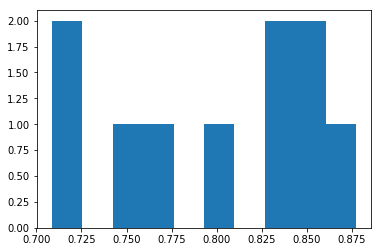

95.0 confidence interval 71.1% and 87.3%


In [144]:
# plot scores
plt.hist(results)
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(results, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(results, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

#### Evaluating Model Performance Reange for Gradient Boosting Regressor

In [145]:
gradboostbp = GradientBoostingRegressor(n_estimators = 80, min_samples_split = 5, min_samples_leaf = 5, max_features = 'sqrt',
 max_depth = 8, loss = 'huber', learning_rate = 0.1, criterion = 'mae')

In [146]:
seed = 39

results = cross_val_score(gradboostbp, X_test, y_test, cv=10)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.79740232 0.73841385 0.92421298 0.90818925 0.8542183  0.89657223
 0.75808159 0.76631771 0.80393762 0.89194104]
Accuracy: 83.393% (6.561%)


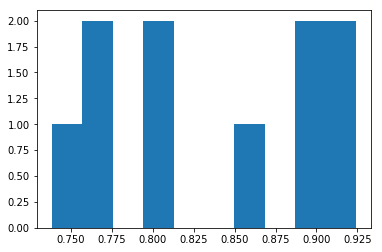

95.0 confidence interval 74.3% and 92.1%


In [147]:
# plot scores
plt.hist(results)
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(results, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(results, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

#### Overall Conclusion: Bagging Regressor and Gradient Boosting Regressor seemed to be best suited models for this assign